# Import Libraries

In [1]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# !pip install openpyxl


In [3]:
from EDA import *
from data_preprocess import *
from data_clean import *

In [4]:
# df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
df_desc =  pd.read_excel('data/Field Descriptions.xlsx')
# df.to_pickle('../data/data_in_Dataframe.pkl')
df = pd.read_pickle('data/data_in_Dataframe.pkl')


# Explore Data

In [5]:
df.shape

(150001, 55)

In [6]:
# the total amount of empty entries in each column with total percentage
df.isnull().sum()/df.shape[0]*100

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [7]:
df.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [8]:
# Columns having missing values
missing_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype=='object']
missing_non_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype !='object']

In [9]:
missing_percent = get_numerical_summary(df,missing_categorical_columns)


Last Location Name : 1153 (0.769%)
Handset Manufacturer : 572 (0.381%)
Handset Type : 572 (0.381%)


In [10]:
get_value_counts(df)

----------------------------------
Last Location Name 

D41377B             80
D17085A             59
D72396C             57
9164566985995010    55
D73604C             55
                    ..
L61017C              1
T94246B              1
D72724B              1
D21664A              1
L88342B              1
Name: Last Location Name, Length: 45547, dtype: int64
----------------------------------
Handset Manufacturer 

Apple                               59565
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64
----------------------------------
Handset Type 

Huawei B528S-

In [11]:
df['Handset Type'].value_counts()[:10]

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [12]:
df[missing_categorical_columns].describe()

,Last Location Name,Handset Manufacturer,Handset Type
count,148848,149429,149429
unique,45547,170,1396
top,D41377B,Apple,Huawei B528S-23A
freq,80,59565,19752


In [13]:
# we can remove it as outlier if the category missing biases the model
df = add_missing(df,missing_categorical_columns)

In [14]:
df[missing_categorical_columns].isnull().sum()

Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64

In [15]:
data_description(df=df,df_desc=df_desc,cols=missing_non_categorical_columns)

Start ==  Start time of the xDR (first frame timestamp)
Start ms ==  Milliseconds offset of start time for the xDR (first frame timestamp)
End ==  End time of the xDR (last frame timestamp)
End ms ==  Milliseconds offset of end time of the xDR (last frame timestamp)
Dur. (ms) ==  Total Duration of the xDR (in ms)
IMSI ==  International Mobile Subscriber Identity
MSISDN/Number ==  MS International PSTN/ISDN Number of mobile - customer number
IMEI ==  International Mobile Equipment Identity
Avg RTT DL (ms) ==  Average Round Trip Time measurement Downlink direction (msecond)
Avg RTT UL (ms) ==  Average Round Trip Time measurement Uplink direction (msecond)
Avg Bearer TP DL (kbps) ==  Average Bearer Throughput for Downlink (kbps) - based on BDR duration
Avg Bearer TP UL (kbps) ==  Average Bearer Throughput for uplink (kbps) - based on BDR duration
TCP DL Retrans. Vol (Bytes) ==  TCP volume of Downlink packets detected as retransmitted (bytes)
TCP UL Retrans. Vol (Bytes) ==  TCP volume of U

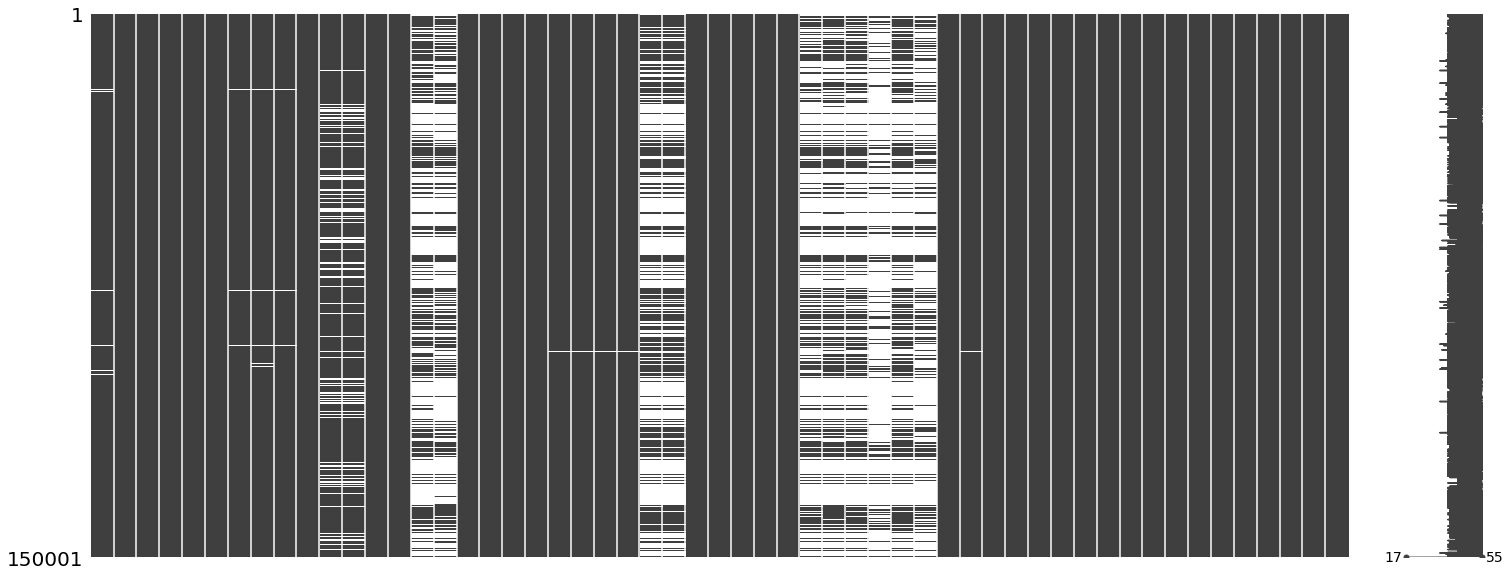

<Figure size 7200x4320 with 0 Axes>

In [16]:
plot_missingno(df)

In [17]:
noncat_missing_percent = get_numerical_summary(df=df,missing_cols=missing_non_categorical_columns)

Bearer Id : 991 (0.661%)
Start : 1 (0.001%)
Start ms : 1 (0.001%)
End : 1 (0.001%)
End ms : 1 (0.001%)
Dur. (ms) : 1 (0.001%)
IMSI : 570 (0.38%)
MSISDN/Number : 1066 (0.711%)
IMEI : 572 (0.381%)
Avg RTT DL (ms) : 27829 (18.553%)
Avg RTT UL (ms) : 27812 (18.541%)
Avg Bearer TP DL (kbps) : 1 (0.001%)
Avg Bearer TP UL (kbps) : 1 (0.001%)
TCP DL Retrans. Vol (Bytes) : 88146 (58.764%)
TCP UL Retrans. Vol (Bytes) : 96649 (64.432%)
DL TP < 50 Kbps (%) : 754 (0.503%)
50 Kbps < DL TP < 250 Kbps (%) : 754 (0.503%)
250 Kbps < DL TP < 1 Mbps (%) : 754 (0.503%)
DL TP > 1 Mbps (%) : 754 (0.503%)
UL TP < 10 Kbps (%) : 792 (0.528%)
10 Kbps < UL TP < 50 Kbps (%) : 792 (0.528%)
50 Kbps < UL TP < 300 Kbps (%) : 792 (0.528%)
UL TP > 300 Kbps (%) : 792 (0.528%)
HTTP DL (Bytes) : 81474 (54.316%)
HTTP UL (Bytes) : 81810 (54.54%)
Activity Duration DL (ms) : 1 (0.001%)
Activity Duration UL (ms) : 1 (0.001%)
Dur. (ms).1 : 1 (0.001%)
Nb of sec with 125000B < Vol DL : 97538 (65.025%)
Nb of sec with 1250B < Vol UL

In [18]:
df[missing_non_categorical_columns].describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,128.000000,52.000000,164.000000,8.000000,288.000000,8.000000,203.000000,217.000000,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,693.500000,203.000000,757.000000,35.000000,1092.000000,31.000000,2650.000000,2451.000000,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,81476.000000,85412.000000,58525.000000,50553.000000,66913.000000,49565.000000,604061.000000,604122.000000,7.833131e+07,9.029696e+08


In [19]:
# for this columns their mean is equal to (nearly) their median so they have 
# normal distribution and we can impute them using the mean or median
normal_dist_cols = ['Start ms', 'End ms', 'IMSI']

In [20]:
df = impute_normal_dist_cols(df=df,cols=normal_dist_cols)

In [21]:
df[normal_dist_cols].isnull().sum()

Start ms    0
End ms      0
IMSI        0
dtype: int64

In [22]:
print(len(missing_non_categorical_columns))
missing_non_categorical_columns = set(missing_non_categorical_columns) - set(normal_dist_cols)
print(len(missing_non_categorical_columns))


38
35


In [23]:
missing_non_categorical_columns = list(missing_non_categorical_columns)
missing_non_categorical_columns.sort()

In [24]:
df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100

10 Kbps < UL TP < 50 Kbps (%)                0.527996
250 Kbps < DL TP < 1 Mbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
50 Kbps < UL TP < 300 Kbps (%)               0.527996
Activity Duration DL (ms)                    0.000667
Activity Duration UL (ms)                    0.000667
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Bearer Id                                    0.660662
DL TP < 50 Kbps (%)                          0.502663
DL TP > 1 Mbps (%)                           0.502663
Dur. (ms)                                    0.000667
Dur. (ms).1                                  0.000667
End                                          0.000667
HTTP DL (Bytes)                             54.315638
HTTP UL (Bytes)                             54.539636
IMEI                        

In [25]:
df_temp = df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100
missing_less_cols = []
final_missing_cols = []
for i,x in df_temp.items():
    if x <1:
        missing_less_cols.append(i)
    else:
        final_missing_cols.append(i)

In [26]:
# columns with missing value that is less than 1%
df[missing_less_cols].isnull().sum()/df.shape[0]*100


10 Kbps < UL TP < 50 Kbps (%)     0.527996
250 Kbps < DL TP < 1 Mbps (%)     0.502663
50 Kbps < DL TP < 250 Kbps (%)    0.502663
50 Kbps < UL TP < 300 Kbps (%)    0.527996
Activity Duration DL (ms)         0.000667
Activity Duration UL (ms)         0.000667
Avg Bearer TP DL (kbps)           0.000667
Avg Bearer TP UL (kbps)           0.000667
Bearer Id                         0.660662
DL TP < 50 Kbps (%)               0.502663
DL TP > 1 Mbps (%)                0.502663
Dur. (ms)                         0.000667
Dur. (ms).1                       0.000667
End                               0.000667
IMEI                              0.381331
MSISDN/Number                     0.710662
Nb of sec with Vol DL < 6250B     0.503330
Nb of sec with Vol UL < 1250B     0.528663
Start                             0.000667
Total DL (Bytes)                  0.000667
Total UL (Bytes)                  0.000667
UL TP < 10 Kbps (%)               0.527996
UL TP > 300 Kbps (%)              0.527996
dtype: floa

In [27]:
# columns with missing value that is more than 1%
df[final_missing_cols].isnull().sum()/df.shape[0]*100


Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
HTTP DL (Bytes)                             54.315638
HTTP UL (Bytes)                             54.539636
Nb of sec with 125000B < Vol DL             65.024900
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol DL < 31250B      58.877607
Nb of sec with 6250B < Vol UL < 37500B      74.561503
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
dtype: float64

In [28]:
# we can see select those with minimum null percentage and impute them using their median
df = impute_skewed(df=df,cols=missing_less_cols)

In [29]:
df[missing_less_cols].isnull().sum()

10 Kbps < UL TP < 50 Kbps (%)     0
250 Kbps < DL TP < 1 Mbps (%)     0
50 Kbps < DL TP < 250 Kbps (%)    0
50 Kbps < UL TP < 300 Kbps (%)    0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
Bearer Id                         0
DL TP < 50 Kbps (%)               0
DL TP > 1 Mbps (%)                0
Dur. (ms)                         0
Dur. (ms).1                       0
End                               0
IMEI                              0
MSISDN/Number                     0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Start                             0
Total DL (Bytes)                  0
Total UL (Bytes)                  0
UL TP < 10 Kbps (%)               0
UL TP > 300 Kbps (%)              0
dtype: int64

In [30]:
# we can impute these features using KNN imputing or the novel approach of multivariate feature imputation [we can evaluate their performamnce later]
df[final_missing_cols].isnull().sum()

Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
HTTP DL (Bytes)                              81474
HTTP UL (Bytes)                              81810
Nb of sec with 125000B < Vol DL              97538
Nb of sec with 1250B < Vol UL < 6250B        92894
Nb of sec with 31250B < Vol DL < 125000B     93586
Nb of sec with 37500B < Vol UL              130254
Nb of sec with 6250B < Vol DL < 31250B       88317
Nb of sec with 6250B < Vol UL < 37500B      111843
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
dtype: int64

# Encoding

### Frequency Encoding
- I used frequency encoding because the number of occurence is an important information in the categorical features as it represents customers choice

In [31]:
categorical_columns = [col for col in df.columns if  df[col].dtype=='object']

In [32]:
categorical_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [33]:
df = frequency_encoder(df=df,cols=categorical_columns)


# Data Imputation


In [34]:
# we can remove the encoded features
df = drop_cols(df=df,cols=categorical_columns)

In [35]:
total_cols_without_datetime= [x for x in df.columns if df[x].dtype != 'datetime64[ns]']

### 1. KNN Imputer

In [36]:
from sklearn.impute import KNNImputer
df_knn = df[total_cols_without_datetime].copy()

In [37]:
# Initializing KNNImputer
knn = KNNImputer()

# knn.fit(df_knn)

In [38]:
# df_knn = knn.transform(df_knn)

In [ ]:
df_knn = pd.DataFrame(data = df_knn,columns=total_cols_without_datetime)
df_iterative.to_pickle('data/df_knn.pkl')

### 2. Multi-variate Feature Imputer

In [39]:
df_iterative = df[total_cols_without_datetime].copy()

In [40]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_iterative)
df_iterative = imp.transform(df_iterative)

In [41]:
df_iterative = pd.DataFrame(data = df_iterative,columns=total_cols_without_datetime)

In [42]:
df_iterative.to_pickle('data/df_iterative.pkl')

### 3. Median Imputer

In [43]:
df_median = df[total_cols_without_datetime].copy()


In [44]:
df_median = impute_skewed(df=df_median,cols=final_missing_cols)

In [45]:
df_median.to_pickle('data/df_median.pkl')

# Scaling and Standardization

### minmax scaling

In [51]:
df_median=pd.read_pickle('data/df_median.pkl')
df_iterative=pd.read_pickle('data/df_iterative.pkl')
df_knn=pd.read_pickle('data/df_knn.pkl')

In [52]:
columns = df_median.columns
df_median = scale_dataframe(df=df_median,cols=columns)
df_iterative = scale_dataframe(df=df_iterative,cols=columns)
df_knn = scale_dataframe(df=df_knn,cols=columns)

In [53]:
df_iterative.to_pickle('data/scaled_df_iterative.pkl')
df_median.to_pickle('data/scaled_df_median.pkl')
df_knn.to_pickle('data/scaled_df_knn.pkl')